In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Import telco customer data 
df= pd.read_csv("C:\\Users\\Laptop\\Untitled Folder 1\\Datasets\\Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
df.drop("customerID", axis=1, inplace=True)

In [9]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

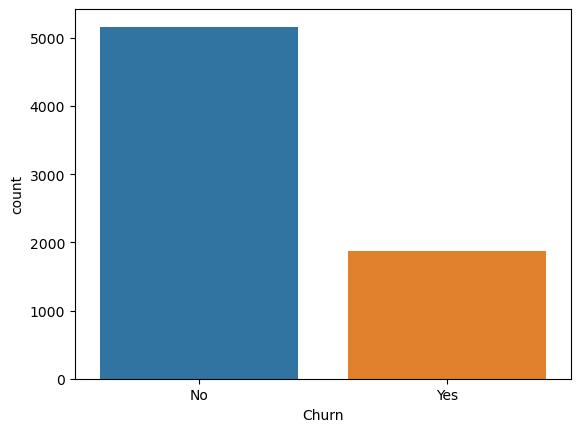

In [15]:
sns.countplot(x="Churn", data= df)

In [18]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
df.shape

(7032, 20)

In [21]:
#print unique value for all coloumns
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [22]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
#Some of the columns have no internet service or no phone service, that can be replaced with a simple No
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [25]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [27]:
#Convert Yes and No to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [29]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [30]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [34]:
#covert other columns to dummies columns
df= pd.get_dummies(data=df, columns=['gender','InternetService','Contract','PaymentMethod'])


In [35]:
df.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [37]:
corr_df= df.corr()
corr_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,-0.060577,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,0.120206,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,0.063053,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,0.325288,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,-0.095138,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,0.100421,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,0.354458,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,0.293705,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,0.332850,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325
TechSupport,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.100421,0.354458,0.293705,0.332850,1.000000,...,0.312183,-0.020299,-0.335695,-0.285491,0.096258,0.240924,0.100472,0.117024,-0.114807,-0.084631


In [38]:
corr_df["Churn"].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
OnlineSecurity                            -0.171270
TechSupport                               -0.164716
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
gender_Male                               -0.008545
gender_Female                              0.008545
PhoneService                               0.011691
MultipleLines                              0.040033
StreamingMov

In [39]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
gender_Female: [1 0]
gender_Male: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [40]:
#Scale this numeric value
from sklearn.preprocessing import MinMaxScaler

In [42]:
scale_col=['tenure','MonthlyCharges','TotalCharges']
scaler= MinMaxScaler()
df[scale_col]= scaler.fit_transform(df[scale_col])

In [43]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
Streaming

In [44]:
len(df)

7032

In [46]:
#train test split
X = df.drop('Churn',axis='columns')
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [47]:
X_train.shape

(5274, 27)

In [48]:
len(X_train.columns)

27

In [73]:
#Build a model (ANN) in tensorflow/keras
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(27, input_shape=(27,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=5)
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.5074 - accuracy: 0.7342 - val_loss: 0.4295 - val_accuracy: 0.8060
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.7897 - val_loss: 0.4251 - val_accuracy: 0.7981
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.7929 - val_loss: 0.4193 - val_accuracy: 0.8180
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.7983 - val_loss: 0.4158 - val_accuracy: 0.8129
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.7981 - val_loss: 0.4167 - val_accuracy: 0.8134
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8007 - val_loss: 0.4152 - val_accuracy: 0.8134
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8034 - val_loss: 0.4185 - val_accuracy: 0.8032

Epoch 58/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8286 - val_loss: 0.4344 - val_accuracy: 0.7969
Epoch 59/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8271 - val_loss: 0.4285 - val_accuracy: 0.8083
Epoch 60/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8257 - val_loss: 0.4324 - val_accuracy: 0.8077
Epoch 61/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8286 - val_loss: 0.4331 - val_accuracy: 0.8049
Epoch 62/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8271 - val_loss: 0.4315 - val_accuracy: 0.8038
Epoch 63/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8290 - val_loss: 0.4357 - val_accuracy: 0.7998
Epoch 64/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8275 - val_loss: 0.4336 - val_accuracy:

In [74]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7964


[0.45433005690574646, 0.7963594794273376]

In [ ]:
#adding dense layer

In [78]:
#Build a model (ANN) in tensorflow/keras

model = keras.Sequential([
    keras.layers.Dense(27, input_shape=(27,), activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=5)
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.6020 - accuracy: 0.6693 - val_loss: 0.4694 - val_accuracy: 0.7708
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7410 - val_loss: 0.4437 - val_accuracy: 0.7810
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7569 - val_loss: 0.4326 - val_accuracy: 0.7929
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7550 - val_loss: 0.4299 - val_accuracy: 0.7969
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7611 - val_loss: 0.4301 - val_accuracy: 0.7992
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7649 - val_loss: 0.4276 - val_accuracy: 0.7981
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7660 - val_loss: 0.4274 - val_accuracy: 0.7992

Epoch 58/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.7895 - val_loss: 0.4135 - val_accuracy: 0.8094
Epoch 59/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.7850 - val_loss: 0.4125 - val_accuracy: 0.8117
Epoch 60/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.7909 - val_loss: 0.4128 - val_accuracy: 0.8117
Epoch 61/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7911 - val_loss: 0.4128 - val_accuracy: 0.8089
Epoch 62/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.7922 - val_loss: 0.4118 - val_accuracy: 0.8089
Epoch 63/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7943 - val_loss: 0.4142 - val_accuracy: 0.8106
Epoch 64/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.7924 - val_loss: 0.4128 - val_accuracy:

In [81]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8038


[0.4119584560394287, 0.8037542700767517]

In [97]:
predict= model.predict(X_test)

55/55 [==============================] - 0s 1ms/step


In [98]:
pred = []
for element in predict:
    if element > 0.5:
        pred.append(1)
    else:
        pred.append(0)

In [101]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1329
           1       0.62      0.50      0.55       429

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.79      0.80      0.80      1758



In [51]:
#in keras there is a build in function to solve overfitting 
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor="val_loss", mode= "min", verbose=1, patience= 25)


In [53]:
#Build a model (ANN) in tensorflow/keras
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(27, input_shape=(27,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=5)
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/100
165/165 [==============================] - 1s 6ms/step - loss: 0.4880 - accuracy: 0.7543 - val_loss: 0.4301 - val_accuracy: 0.8049
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7861 - val_loss: 0.4261 - val_accuracy: 0.7992
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7911 - val_loss: 0.4174 - val_accuracy: 0.8134
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.7958 - val_loss: 0.4165 - val_accuracy: 0.8117
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.7956 - val_loss: 0.4137 - val_accuracy: 0.8151
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8000 - val_loss: 0.4144 - val_accuracy: 0.8094
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.7984 - val_loss: 0.4123 - val_accuracy: 0.8123

In [54]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8020


[0.4177778959274292, 0.8020477890968323]

In [55]:
yp = model.predict(X_test)

55/55 [==============================] - 0s 1ms/step


In [56]:
#convert prediction floting number to o,1
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [59]:
y_pred[:20]

[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]

In [60]:
y_test[:20]

4246    0
2909    0
1564    0
5218    0
4419    0
5870    0
155     0
109     0
5015    1
5248    1
2618    0
1689    1
4380    0
4021    0
4308    1
1269    0
5354    0
1608    0
1891    0
5609    0
Name: Churn, dtype: int64

In [61]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1329
           1       0.62      0.48      0.54       429

    accuracy                           0.80      1758
   macro avg       0.73      0.69      0.71      1758
weighted avg       0.79      0.80      0.79      1758



<Axes: >

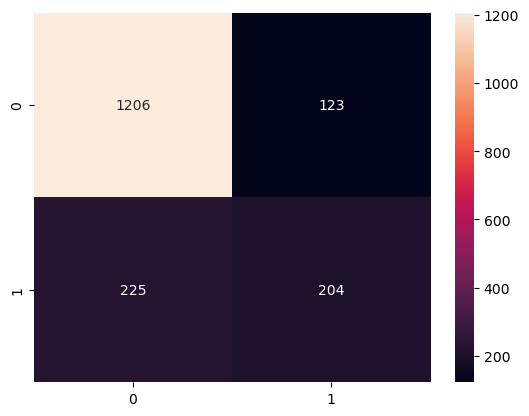

In [64]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")